In [1]:
# Step 1: Importing Essential Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Step 2: Loading the CSV file
from google.colab import files
uploaded = files.upload()
csv_filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(csv_filename)
print("Dataset Preview:\n", df.head())

Saving HAM10000_metadata.csv to HAM10000_metadata.csv
Dataset Preview:
      lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [3]:
# Step 3: Handling Categorical and Missing Data
# Encode categorical columns
categorical_columns = ['sex', 'localization']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Fill missing values (e.g., age) with the mean
if 'age' in df.columns:
    df['age'].fillna(df['age'].mean(), inplace=True)

# Encode the target variable (dx)
df['dx'] = LabelEncoder().fit_transform(df['dx'])
print(f"Target Classes: {df['dx'].unique()}")

Target Classes: [2 5 3 4 6 1 0]


<ipython-input-3-01d18bf0be41>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [4]:
# Step 4: Feature Selection and Scaling
# Drop irrelevant columns
columns_to_drop = ['image_id', 'dx_type']  # Drop non-numeric and non-relevant columns
X = df.drop(columns=columns_to_drop + ['dx'])  # Keep only feature columns
y = to_categorical(df['dx'], num_classes=df['dx'].nunique())

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill any remaining missing values
X.fillna(0, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Model Building
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,631 (10.28 KB)

 Trainable params: 2,631 (10.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5840 - loss: 1.3421 - val_accuracy: 0.6812 - val_loss: 0.9904
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6784 - loss: 1.0282 - val_accuracy: 0.6800 - val_loss: 0.9778
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6664 - loss: 1.0406 - val_accuracy: 0.6868 - val_loss: 0.9691
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6763 - loss: 1.0058 - val_accuracy: 0.6875 - val_loss: 0.9657
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6649 - loss: 1.0160 - val_accuracy: 0.6862 - val_loss: 0.9602
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6673 - loss: 1.0116 - val_accuracy: 0.6831 - val_loss: 0.9572
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6739 - loss: 0.9978 - val_accuracy: 0.6918 - val_loss: 0.9562
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6874 - loss: 0.9949 - val_accuracy: 0.

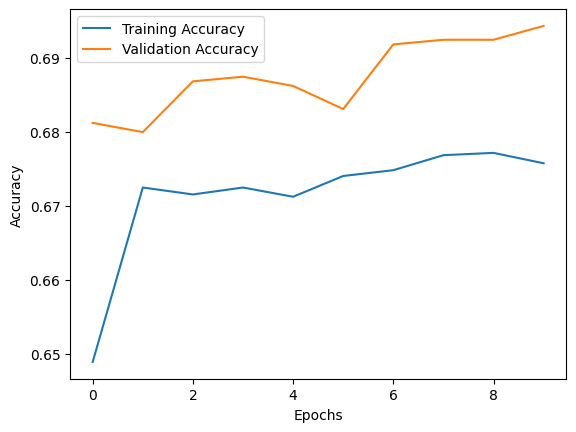

In [6]:
# Step 6: Training the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)

# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# Step 7: Testing the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6584 - loss: 0.9850  
Test Accuracy: 68.00%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        93
           2       0.36      0.16      0.22       228
           3       0.00      0.00      0.00        28
           4       0.23      0.04      0.07       226
           5       0.71      0.98      0.82      1338
           6       0.00      0.00      0.00        21

    accuracy                           0.68      2003
   macro avg       0.19      0.17      0.16      2003
weighted avg       0.54      0.68      0.58      2003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
